# <span style="color:darkblue"> Laboratorio di Simulazioni Numeriche </span>
## <span style="color:purple"> Lezione 4.3 - Test di Irreversibilità Temporale </span>

### Obiettivo
Investigare la **freccia del tempo** e l'irreversibilità termodinamica tentando di ritornare alla configurazione iniziale ordinata tramite inversione temporale.

### Background Teorico: Paradosso di Loschmidt

Il **paradosso di Loschmidt** evidenzia l'apparente contraddizione tra:
- **Reversibilità microscopica**: le equazioni di Newton sono invarianti per inversione temporale t → -t
- **Irreversibilità macroscopica**: il secondo principio della termodinamica stabilisce che l'entropia aumenta

#### Protocollo Sperimentale
1. **Stato iniziale**: configurazione finale equilibrata dell'Esercizio 4.2
2. **Inversione temporale**: invertire le velocità finali v⃗ᵢ(t) → -v⃗ᵢ(t)
3. **Evoluzione "a ritroso"**: integrare le equazioni del moto con velocità invertite

#### Meccanismo della Perdita di Reversibilità
La risoluzione del paradosso risiede nella **sensibilità** alle condizioni iniziali:
- **Chaos deterministico**: piccole perturbazioni crescono esponenzialmente
- **Errori numerici**: l'integrazione numerica introduce inevitabili approssimazioni

<p style="border:2px; border-style:solid; border-color:#E6E6FA; padding: 1em; background-color:#F0F8FF">
<b>Setup sperimentale:</b><br>
• Prendi le configurazioni finali di 4.2 come condizioni iniziali<br>
• Inverti le velocità: v⃗ → -v⃗ (invertendo le posizioni finali e penultime)<br>
• Simula l'evoluzione "temporale inversa"<br>
• Confronta con la configurazione cristallina iniziale di 4.2
</p>

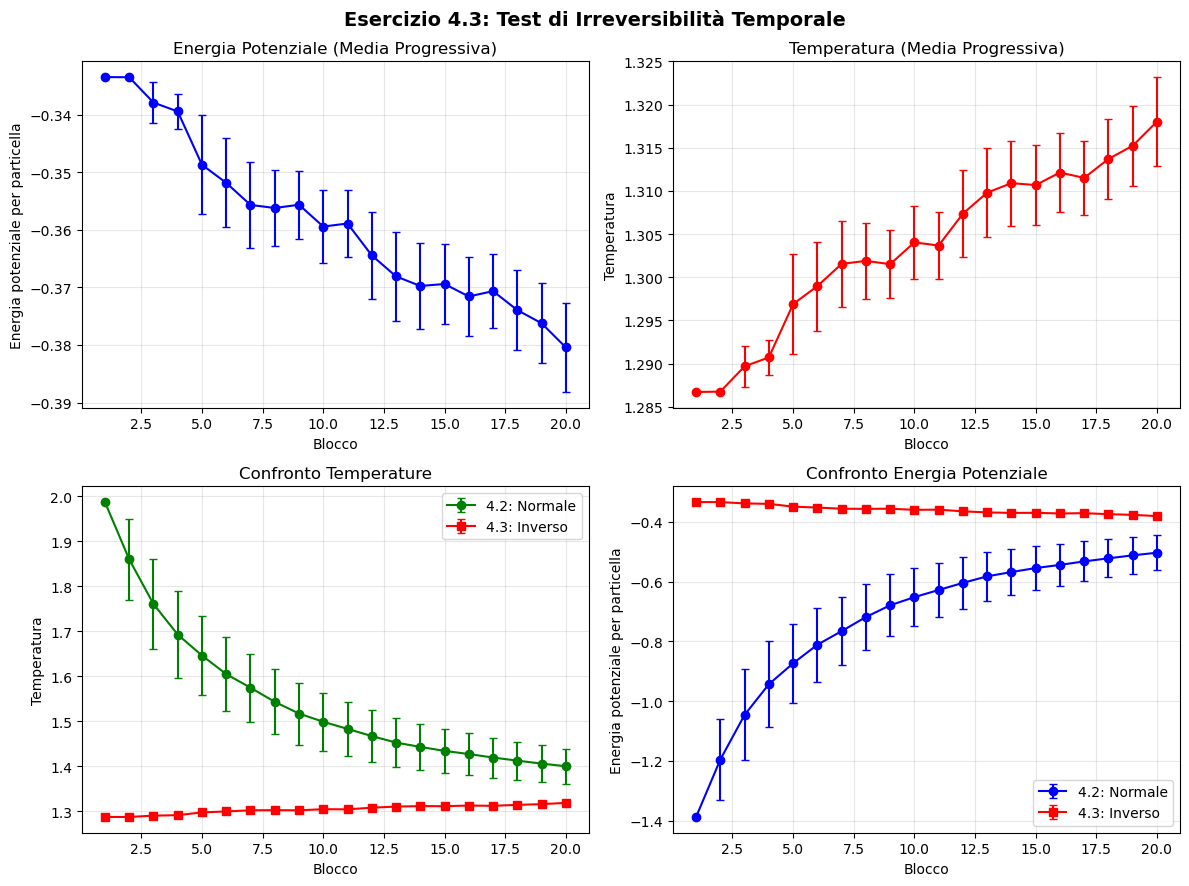

Temperatura finale: 1.318
Energia potenziale finale: -0.380
Risultato: Il sistema NON ritorna alla configurazione cristallina iniziale


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

def find_output_file(fname):
    candidates = [os.path.join("OUTPUT", fname), os.path.join("..", "OUTPUT", fname),
                  os.path.join(".", fname), os.path.join("..", fname)]
    for c in candidates:
        if os.path.isfile(c):
            return c
    raise FileNotFoundError(f"File {fname} non trovato")

# Caricamento dati
temp_path = find_output_file("temperature.dat")
pot_path = find_output_file("potential_energy.dat")

# Temperatura
temp_data = np.loadtxt(temp_path)
if temp_data.ndim == 1:
    temp_data = temp_data.reshape((1, -1))

blocks = temp_data[:,0].astype(int)
temp_prog = temp_data[:,2]       # temperatura media progressiva
temp_err = temp_data[:,3]        # errore

# Energia potenziale
pot_data = np.loadtxt(pot_path)
if pot_data.ndim == 1:
    pot_data = pot_data.reshape((1, -1))

pot_prog = pot_data[:,2][:len(blocks)]     # energia potenziale media progressiva
pot_err = pot_data[:,3][:len(blocks)]      # errore

#grafici
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle('Esercizio 4.3: Test di Irreversibilità Temporale', fontsize=14, fontweight='bold')

# Grafico 1: Energia Potenziale
ax = axes[0,0]
ax.errorbar(blocks, pot_prog, yerr=pot_err, fmt='o-', capsize=3, color='blue')
ax.set_xlabel('Blocco')
ax.set_ylabel('Energia potenziale per particella')
ax.set_title('Energia Potenziale (Media Progressiva)')
ax.grid(True, alpha=0.3)

# Grafico 2: Temperatura
ax = axes[0,1]
ax.errorbar(blocks, temp_prog, yerr=temp_err, fmt='o-', capsize=3, color='red')
ax.set_xlabel('Blocco')
ax.set_ylabel('Temperatura')
ax.set_title('Temperatura (Media Progressiva)')
ax.grid(True, alpha=0.3)

# Confronto con dati 4.2
forward_temp_path = None
forward_pot_path = None
candidates_42 = ["../4_2/NSL_SIMULATOR/OUTPUT/temperature.dat", "../../4_2/NSL_SIMULATOR/OUTPUT/temperature.dat",
                 "../4_2/OUTPUT/temperature.dat", "../../4_2/OUTPUT/temperature.dat"]
for path in candidates_42:
    if os.path.exists(path):
        forward_temp_path = path
        forward_pot_path = path.replace("temperature.dat", "potential_energy.dat")
        break

if forward_temp_path and os.path.exists(forward_pot_path):
    # Carica dati 4.2
    forward_temp = np.loadtxt(forward_temp_path)
    forward_pot = np.loadtxt(forward_pot_path)
    if forward_temp.ndim == 1:
        forward_temp = forward_temp.reshape((1, -1))
    if forward_pot.ndim == 1:
        forward_pot = forward_pot.reshape((1, -1))
    
    # Confronto Temperature
    ax = axes[1,0]
    ax.errorbar(forward_temp[:,0], forward_temp[:,2], yerr=forward_temp[:,3], 
                fmt='o-', capsize=3, label='4.2: Normale', color='green')
    ax.errorbar(blocks, temp_prog, yerr=temp_err, 
                fmt='s-', capsize=3, label='4.3: Inverso', color='red')
    ax.set_xlabel('Blocco')
    ax.set_ylabel('Temperatura')
    ax.set_title('Confronto Temperature')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Confronto Energia Potenziale
    ax = axes[1,1]
    ax.errorbar(forward_pot[:,0], forward_pot[:,2], yerr=forward_pot[:,3], 
                fmt='o-', capsize=3, label='4.2: Normale', color='blue')
    ax.errorbar(blocks, pot_prog, yerr=pot_err, 
                fmt='s-', capsize=3, label='4.3: Inverso', color='red')
    ax.set_xlabel('Blocco')
    ax.set_ylabel('Energia potenziale per particella')
    ax.set_title('Confronto Energia Potenziale')
    ax.legend()
    ax.grid(True, alpha=0.3)

else:
    ax = axes[1,0]
    ax.errorbar(blocks, temp_prog, yerr=temp_err, fmt='o-', capsize=3, color='red')
    T_cristallo = 0.5
    ax.axhline(T_cristallo, color='blue', linestyle='--', label=f'T cristallo ~ {T_cristallo}')
    ax.set_xlabel('Blocco')
    ax.set_ylabel('Temperatura')
    ax.set_title('Temperatura vs Riferimento Cristallo')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Trend Energia Potenziale
    ax = axes[1,1]
    ax.errorbar(blocks, pot_prog, yerr=pot_err, fmt='o-', capsize=3, color='blue')
    trend = np.polyfit(blocks, pot_prog, 1)[0]
    ax.plot(blocks, np.polyfit(blocks, pot_prog, 1)[0] * blocks + np.polyfit(blocks, pot_prog, 1)[1], 
            'r--', alpha=0.7, label=f'Trend: {trend:.6f}/blocco')
    ax.set_xlabel('Blocco')
    ax.set_ylabel('Energia potenziale')
    ax.set_title('Trend Energia Potenziale')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisi configurazioni spaziali
cfg_candidates = glob.glob(os.path.join("OUTPUT","CONFIG","config_*.xyz")) + \
                glob.glob(os.path.join("..","OUTPUT","CONFIG","config_*.xyz"))
cfg_candidates = sorted(cfg_candidates)

if len(cfg_candidates) > 0:
    early_cfg = cfg_candidates[0]
    final_cfg = cfg_candidates[-1]
    
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(12,5))
    
    # Configurazione iniziale
    ax1 = fig.add_subplot(1,2,1, projection='3d')
    data_initial = np.loadtxt(early_cfg, skiprows=2)
    x_i, y_i, z_i = data_initial[:,1], data_initial[:,2], data_initial[:,3]
    ax1.scatter(x_i, y_i, z_i, s=20, alpha=0.7, c=z_i, cmap='viridis')
    ax1.set_title('Configurazione Iniziale')
    ax1.set_xlabel('x'); ax1.set_ylabel('y'); ax1.set_zlabel('z')
    
    # Configurazione finale
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    data_final = np.loadtxt(final_cfg, skiprows=2)
    x_f, y_f, z_f = data_final[:,1], data_final[:,2], data_final[:,3]
    ax2.scatter(x_f, y_f, z_f, s=20, alpha=0.7, c=z_f, cmap='viridis')
    ax2.set_title('Configurazione Finale')
    ax2.set_xlabel('x'); ax2.set_ylabel('y'); ax2.set_zlabel('z')
    
    plt.suptitle('Confronto Configurazioni Spaziali')
    plt.tight_layout()
    plt.show()
    
    # Evoluzione entropia spaziale
    def spatial_entropy(x, y, z, ngrid=6):
        try:
            H, _ = np.histogramdd(np.vstack((x,y,z)).T, bins=(ngrid,ngrid,ngrid))
            probs = H.flatten()
            probs = probs[probs>0] / np.sum(H)
            return -np.sum(probs * np.log(probs))
        except:
            return None
    
    entropies = []
    for cfg in cfg_candidates:
        data = np.loadtxt(cfg, skiprows=2)
        ent = spatial_entropy(data[:,1], data[:,2], data[:,3])
        entropies.append(ent)
    
    plt.figure(figsize=(8,5))
    plt.plot(range(len(entropies)), entropies, 'o-', linewidth=2, markersize=4)
    plt.xlabel('Snapshot')
    plt.ylabel('Entropia spaziale')
    plt.title('Evoluzione Entropia Spaziale')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Risultati numerici
    order_initial = np.std(x_i) + np.std(y_i) + np.std(z_i)
    order_final = np.std(x_f) + np.std(y_f) + np.std(z_f)
    entropy_change = entropies[-1] - entropies[0]
    
    print(f"Ordine spaziale iniziale: {order_initial:.3f}")
    print(f"Ordine spaziale finale: {order_final:.3f}")
    print(f"Variazione entropia: {entropy_change:.3f}")

# Risultati finali
print(f"Temperatura finale: {temp_prog[-1]:.3f}")
print(f"Energia potenziale finale: {pot_prog[-1]:.3f}")

# Valutazione successo inversione temporale
if temp_prog[-1] > 1.0:
    print("Risultato: Il sistema NON ritorna alla configurazione cristallina iniziale")
else:
    print("Risultato: Possibile parziale ritorno verso configurazione ordinata")

Uso file: OUTPUT/kinetic_energy.dat OUTPUT/potential_energy.dat OUTPUT/temperature.dat
Salvato: energy_progressive.png


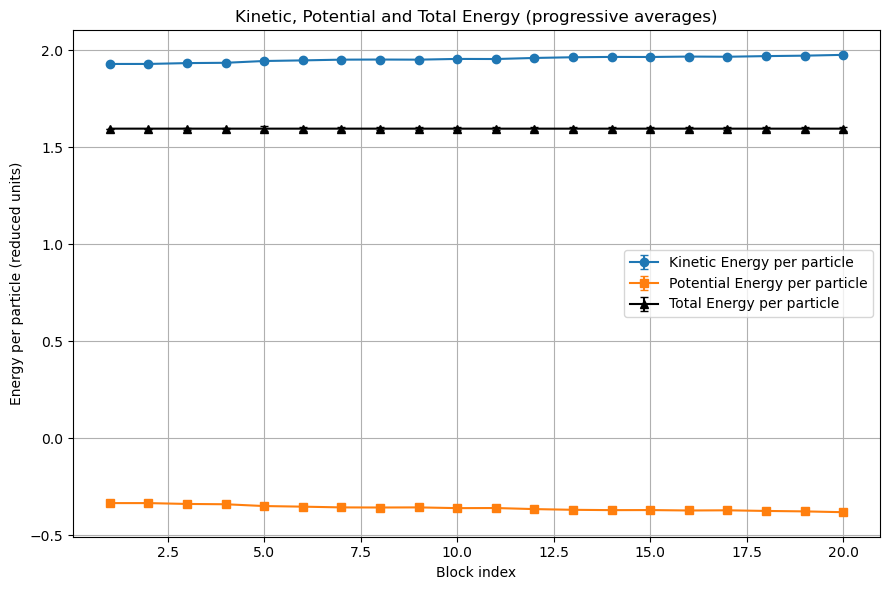

Salvato: temperature_progressive.png


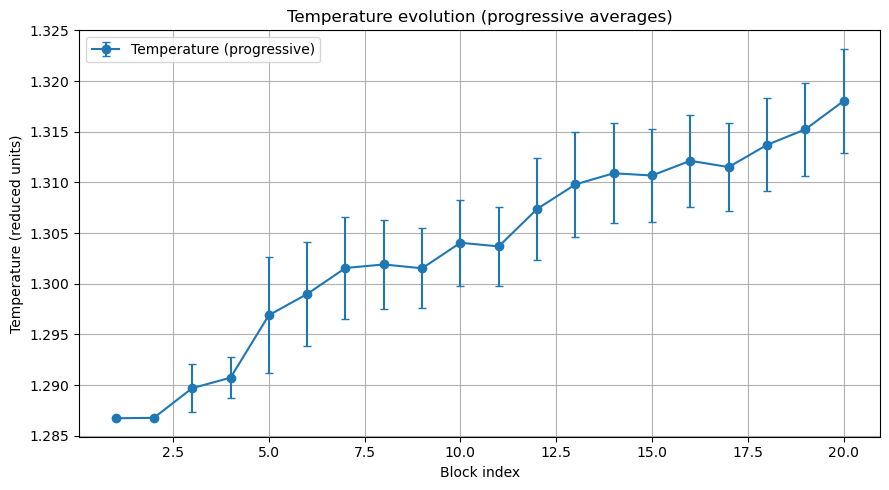


Ultimi valori (block 20):
Kinetic (prog,err) = 1.97704 0.00773045
Potential (prog,err) = -0.380433 0.00773825
Total   (prog,err) = 1.5966069999999999 0.01093802405670238
Temperature (prog,err) = 1.31803 0.00515363


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

def find_file(name):
    candidates = [os.path.join("OUTPUT", name), os.path.join("..","OUTPUT", name),
                  name, os.path.join("..", name)]
    for c in candidates:
        if os.path.isfile(c):
            return c
    raise FileNotFoundError(f"File {name} non trovato nei percorsi: {candidates}")

def load_progressive_file(path):
    data = np.loadtxt(path)
    if data.ndim == 1:
        data = data.reshape((1,-1))
    blocks = data[:,0].astype(int)
    avg_prog = data[:,2]
    err_prog = data[:,3]
    return blocks, avg_prog, err_prog

# ---- trova i file ----
try:
    kin_f = find_file("kinetic_energy.dat")
    pot_f = find_file("potential_energy.dat")
    temp_f = find_file("temperature.dat")
except FileNotFoundError as e:
    print(e)
    raise SystemExit(1)

print("Uso file:", kin_f, pot_f, temp_f)

# ---- carica dati ----
blk_k, kin_prog, kin_err = load_progressive_file(kin_f)
blk_p, pot_prog, pot_err = load_progressive_file(pot_f)
blk_t, temp_prog, temp_err = load_progressive_file(temp_f)

nblocks = min(len(blk_k), len(blk_p), len(blk_t))
blk = blk_k[:nblocks]
kin_prog = kin_prog[:nblocks]; kin_err = kin_err[:nblocks]
pot_prog = pot_prog[:nblocks]; pot_err = pot_err[:nblocks]
temp_prog = temp_prog[:nblocks]; temp_err = temp_err[:nblocks]

# ---- total energy e propagazione errore ----
total_prog = kin_prog + pot_prog
total_err = np.sqrt( kin_err**2 + pot_err**2 )

# ---- plot Energies (K, P, Total) ----
plt.figure(figsize=(9,6))
plt.errorbar(blk, kin_prog, yerr=kin_err, fmt='o-', label='Kinetic Energy per particle', capsize=3)
plt.errorbar(blk, pot_prog, yerr=pot_err, fmt='s-', label='Potential Energy per particle', capsize=3)
plt.errorbar(blk, total_prog, yerr=total_err, fmt='^-', label='Total Energy per particle', capsize=3, color='black')
plt.xlabel('Block index')
plt.ylabel('Energy per particle (reduced units)')
plt.title('Kinetic, Potential and Total Energy (progressive averages)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('energy_progressive.png', dpi=200)
print("Salvato: energy_progressive.png")
plt.show()

# ---- plot Temperature ----
plt.figure(figsize=(9,5))
plt.errorbar(blk, temp_prog, yerr=temp_err, fmt='o-', label='Temperature (progressive)', capsize=3)
# prova a leggere TEMP da ../INPUT/input.dat e disegnare linea orizzontale se esiste
input_paths = [os.path.join("INPUT","input.dat"), os.path.join("..","INPUT","input.dat"), "input.dat", os.path.join("..","input.dat")]
temp_input_val = None
for ip in input_paths:
    if os.path.isfile(ip):
        try:
            with open(ip,'r') as f:
                for line in f:
                    toks = line.split()
                    if len(toks) >= 2 and toks[0].upper() == "TEMP":
                        try:
                            temp_input_val = float(toks[1])
                            print("Trovato TEMP in", ip, "=", temp_input_val)
                        except:
                            pass
                        break
        except:
            pass
        if temp_input_val is not None:
            break

if temp_input_val is not None:
    plt.axhline(temp_input_val, color='red', linestyle='--', label=f"T input = {temp_input_val:.3f}")

plt.xlabel('Block index')
plt.ylabel('Temperature (reduced units)')
plt.title('Temperature evolution (progressive averages)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('temperature_progressive.png', dpi=200)
print("Salvato: temperature_progressive.png")
plt.show()


# Stampa ultimi valori
print("\nUltimi valori (block {}):".format(blk[-1]))
print("Kinetic (prog,err) =", kin_prog[-1], kin_err[-1])
print("Potential (prog,err) =", pot_prog[-1], pot_err[-1])
print("Total   (prog,err) =", total_prog[-1], total_err[-1])
print("Temperature (prog,err) =", temp_prog[-1], temp_err[-1])